# Abgabe SMD Blatt 11 
### von Nico Guth, David Venker, Jan Jäkel

# Aufgabe 22 DeepLearning Kurzfragen

## a) Was beschreibt die Lossfunktion und wofür wird sie benötigt?

Die Lossfunktion beschreibt den "Verlust" bei einem maschinellen Lerner.  
Also sollte die Lossfunktion ein Minimum bei den optimalen Parametern und Gewichten haben.

Sie wird benötigt um während dem Training die Parameter und Gewichte anzupassen.  
Der Optimizer berechnet die Gewichtsanpassungen anhand der Lossfunktion.  

## b) Wie kann die Lossfunktion minimiert werden?

Die meisten Optimizer benutzen eine Art des Gradient Descent.
Also wird der Gradient (Ableitung) nach den Gewichten berechnet und die Gewichte anhand diesem Gradienten verändert.
So sollte sich der Lerner in das Minimum bewegen und im optimalen Fall nicht in lokalen Minima stecken bleiben, dafür muss die Learning Rate angepasst werden.

## c) Welche Funktion haben die Aktivierungsfunktionen bzw. welches Problem wird durch diese gelöst? Nennen Sie drei gängige Aktivierungsfunktionen.

Eine Aktivierungsfunktion berechnet an einem Neuron anhand der Inputs und der Gewichte den Output des Neurons

Benutzt wird $z = \vec{w} \cdot \vec{x}$ wobei $\vec{w}$ der Gewichtsvektor und $\vec{x}$ der Inputvektor ist.

Die einfachste Aktivierungsfunktion ist die Identitätsfunktion $f(z) = z$.

Allerdings lassen sich damit Daten nur anhand einer Hyperebene trennen.  
Deswegen führt man nicht-lineare Aktivierungsfunktionen ein. Beispiele sind:  
- ReLU : $f(z) = \begin{cases}
                    z, & \text{falls } z > 0\\
                    0, & \text{falls } z \leq 0
                \end{cases}$
- Sigmoid : $f(z) = \frac{1}{1+e^z}$
- tanh : $f(z) = \tanh{z} = \frac{e^z - e^{-z}}{e^z + e^{-z}}$

https://en.wikipedia.org/wiki/Activation_function

## d) Was ist ein Neuron?

https://de.wikipedia.org/wiki/K%C3%BCnstliches_neuronales_Netz#/media/Datei:NeuronModel_deutsch.svg

Ein Neuron nimmt Input, gewichtet diesen Input und berechnet über die Aktivierungsfunktion einen Output.  
Neuronen sind untereinander vernetzt und so entsteht ein Neuronales Netz, dass als maschineller Lerner für einen bestimmtes Problem trainiert und benutzt werden kann.

## e) Nennen Sie drei Anwendungsbeispiele für Neuronale Netze und beschreiben Sie kurz warum sie für diese Beispiele besonders geeignet sind. 

So ziemlich jedes Klassifizierungs-, Regressions- oder Clustering-Problem kann mit Neuronalen Netzen gelöst werden.

- Bilderkennung
- Spracherkennung
- Zuordnung von Detektorsignalen zu Teilchen und Energien

Bei diesen Problemen müssen große Mengen von Daten verarbeitet werden und es gibt keine analytischen Lösungen bzw. einfache Alogrithmen um die Problemstellungen zu lösen.
Neuronale Netze können selber lernen welche Features wichtig sind und wie diese zu verarbeiten sind.

# Aufgabe 23: Lineare Klassifikation mit Softmax

Statt der linearen Aktivierungsfunktion wird hier Softmax verwendet und der Error ist hier die Kreuzentropie Lossfunktion.  
$w_0$ ist hier der Biasvektor und $w_i$ sind die Spalten der Gewichtsmatrix.
![](adaline_neurron.png)
(aus dem Buch "Python Machine Learning" von Sebastian Raschka)

## a) Definitionen und Dimensionen der verwendeten Variablen und Funktionen

Ich habe nirgends eine gute Erklärung aller Variablen gefunden, deswegen habe ich mir die Dimensionen und Definitionen selber überlegt.  
Könnte also anders sein als in der Vorlesung angedacht.  

Auch wenn es hier ordentlich aufgeschrieben ist, möchte ich ungerne die Aufgabe vorstellen.  

### Variablen Definitionen:  

- $K$ : Anzahl der Klassen
- $m$ : Anzahl der Beispiele (Samples)
- $M$ : Anzahl der Komponenten (Attribute,Features)
- $x_i$ $(M \times 1)$ : Vektor-Representation eines Samples
- $X$ $(m \times M)$ : Matrix-Representation aller Samples
- $y_i$ : Skalar-Representation der Klasse eines Samples
- $y$ $(m \times 1)$ : Vektor-Representation der Klassen aller Samples
- $Y_i$ $(K \times 1)$ : Vektor-Representation der Klasse eines Samples
- $Y$ $(m \times K)$ : Matrix-Representation der Klassen aller Samples
- $W$ $(K \times M)$ : Gewichtsmatrix
- $b$ $(K \times 1)$ : Biasvektor

### Funktions Definitionen:

Die Funktionen sind in der Reihenfolge der Anwendung gelistet. (siehe Abbildung) 

- vektorwertige Gewichtungsfunktion (eines Samples) $(K \times 1)$:  $$f(x_i) = f_i = W \cdot x_i + b$$
- matrixwertige Gewichtungsfunktion \* (aller Samples) $(m \times K)$: $$f(X) = f = X \cdot W^T + b^T$$
- skalarwertige Softmax Aktivierungsfunktion (einer Klasse eines Samples): $$\phi(f_i,k) = \frac{\exp(f_{i,k})}{\sum_{j=1}^K \exp(f_{i,j})}$$
- vektorwertige Softmax Aktivierungsfunktion \** (eines Samples) $(K \times 1)$: $$\phi(f_i) = \frac{\exp(f_i)}{\sum_{k=1}^K \exp(f_{i,k})}$$
- matrixwertige Softmax Aktivierungsfunktion \** , \*** (aller Samples) $(m \times K)$: $$\phi(f) = \frac{\exp(f)}{\sum_{k=1}^K \exp(f)_{*,k}}$$
- skalarwertige Kreuzentropie Lossfunktion (eines Samples): $$\hat{C}(f_i) = - \sum_{k=1}^K \mathbb{1}(y_i = k) \cdot \log_2(\phi(f_i,k)) = -\log_2(\phi(f_i,y_i))$$
- skalarwertige gemittelte Kreuzentropie Lossfunktion (aller Samples): $$C(f) = \frac{1}{m} \sum_{i=1}^m \hat{C}(f_i)$$

### Gradienten Dimensionen:  

- $$\nabla_W \hat{C} : \, (K \times M)$$
- $$\nabla_b\hat{C} : \, (K \times 1)$$
- $$\frac{\partial f_{i,k}}{\partial W}: \, (K \times M)$$
- $$\frac{\partial f_{i,k}}{\partial b}: \, (K \times 1)$$

### Gewichtsupdates/Gradienten Berechnen:

- Gewichtsgradient: $$\nabla_W C(f) = \frac{1}{m} \sum_{i=1}^m \nabla_W \hat{C}(f_i) = ?? $$
- Biasgradient: $$\nabla_b C(f) = \frac{1}{m} \sum_{i=1}^m \nabla_b \hat{C}(f_i) = ??$$
- $h$: Lern Rate
- Gewichtsupdates: $$W^{(i+1)} = W^{(i)} - h \cdot \nabla_{W^{(i)}}C$$
- Biasupdates: $$b^{(i+1)} = b^{(i)} - h \cdot \nabla_{b^{(i)}}C$$

---
\*  Mit $\exp$(Matrix) ist die elementweise Anwendung gemeint.  
\** Mit Matrix + Zeilenvektor ist gemeint, dass der Vektor auf jede Zeile der Matrix addiert wird.  
\*** Mit Matrix / Spaltenvektor ist gemeint dass jedes Element einer Zeile mit dem entsprechenden Wert im Spaltenvektor dividiert wird.

## d) Implementieren Sie die lineare Klassifikation mit Softmax

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

### Daten einlesen

In [2]:
p0 = pd.read_hdf('populationen.hdf5', key='P_0')
p1 = pd.read_hdf('populationen.hdf5', key='P_1')

In [3]:
p0['pop_label'] = 0
p1['pop_label'] = 1

p0['population 0'] = True
p0['population 1'] = False
p1['population 0'] = False
p1['population 1'] = True

In [4]:
p0, p1

(              x         y  pop_label  population 0  population 1
 0      0.926612  4.717092          0          True         False
 1     -3.953953  1.274478          0          True         False
 2     -7.161693 -0.984415          0          True         False
 3     -0.956840  1.115828          0          True         False
 4     -0.046090  2.083444          0          True         False
 ...         ...       ...        ...           ...           ...
 9995  -6.261494  0.112619          0          True         False
 9996   0.271535  3.590582          0          True         False
 9997  -0.336104  4.283550          0          True         False
 9998   2.231933  4.856312          0          True         False
 9999 -12.845623 -5.292022          0          True         False
 
 [10000 rows x 5 columns],
               x         y  pop_label  population 0  population 1
 0     14.471881  7.470328          1         False          True
 1      6.691571  3.480834          1         F

In [5]:
df = pd.concat([p0,p1],ignore_index=True)
df

,x,y,pop_label,population 0,population 1
0,0.926612,4.717092,0,True,False
1,-3.953953,1.274478,0,True,False
2,-7.161693,-0.984415,0,True,False
3,-0.956840,1.115828,0,True,False
4,-0.046090,2.083444,0,True,False
...,...,...,...,...,...
19995,3.604288,2.839583,1,False,True
19996,0.855397,-0.963416,1,False,True
19997,7.416902,4.290466,1,False,True
19998,9.685447,7.290335,1,False,True


In [6]:
# Feature-Matrix
X = df[['x','y']].to_numpy()
# Target-Vektor
y = df['pop_label'].to_numpy()
# Target-Matrix
Y = df[['population 0','population 1']].to_numpy().astype(int)

In [7]:
X.shape, y.shape, Y.shape

((20000, 2), (20000,), (20000, 2))

### Definition des Modells

In [8]:
def init_weights(X,y):
    # Anzahl der Samples
    m = X.shape[0]
    # Anzahl der Features
    M = X.shape[1]
    # Anzahl der Klassen
    K = np.unique(y).size
    # initialisiere Gewichtsmatrix
    W = np.random.uniform(low=0.01,high=1.0,size=(K,M))
    # initialisiere Biasvektor
    b = np.random.uniform(low=0.01,high=1.0,size=(K,1))
    return W,b

In [9]:
def weightfunction(X,W,b):
    return X@W.T + b.T

In [10]:
def softmax(f):
    return (np.exp(f).T / np.sum(np.exp(f), axis=1)).T

In [11]:
def crossentropy(phi,Y):
    m = y.shape[0]
    return -np.sum(Y*np.log2(phi)) / m

In [12]:
def predict(X,W,b):
    f = weightfunction(X,W,b)
    phi = softmax(f)
    return phi

In [13]:
# Aus dem Jupyter Notebook der Vorlesung
# f,p,y sind (m x K)
# W ist (M+1 x K) bei mir aber (K x M)
# def gradient(W, X, y):
#     f = X@W
#     p = softmax(f)
#     dh = (p - y)
#     dW = ( X.T@dh ) / dh.shape[0]
#     return dW

In [14]:
# Nicht verstanden, aber einfach aus der Vorlesung (abgeändert) übernommen
def gradients(X,Y,phi):
    dh = phi - Y
    dW = (X.T@dh).T / dh.shape[0]
    X_b = np.ones(shape=(X.shape[0],1))
    db = (X_b.T@dh).T / dh.shape[0]
    return dW,db

In [15]:
def fit(X,y,Y,W,b,h,epochs):
    losses = np.zeros(shape=(epochs,))
    for epoch in tqdm(range(epochs),desc='Epoch'):
        phi = predict(X,W,b)
        C = crossentropy(phi,Y)
        dW,db = gradients(X,Y,phi)
        W = W - h*dW
        b = b - h*db
        losses[epoch] = C
    return W,b,losses
        

In [16]:
# Lern rate
h = 0.5
# Anzahl der Trainings-Epochen
epochs = 100

In [17]:
W,b = init_weights(X,y)
W,b,losses = fit(X,y,Y,W,b,h,epochs)

Epoch:   0%|          | 0/100 [00:00<?, ?it/s]

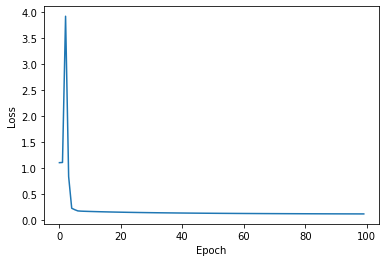

In [18]:
plt.plot(range(losses.size),losses,'-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [19]:
Y_pred = predict(X,W,b)
y_pred = np.argmax(Y_pred,axis=1)

### Prediction Plotten

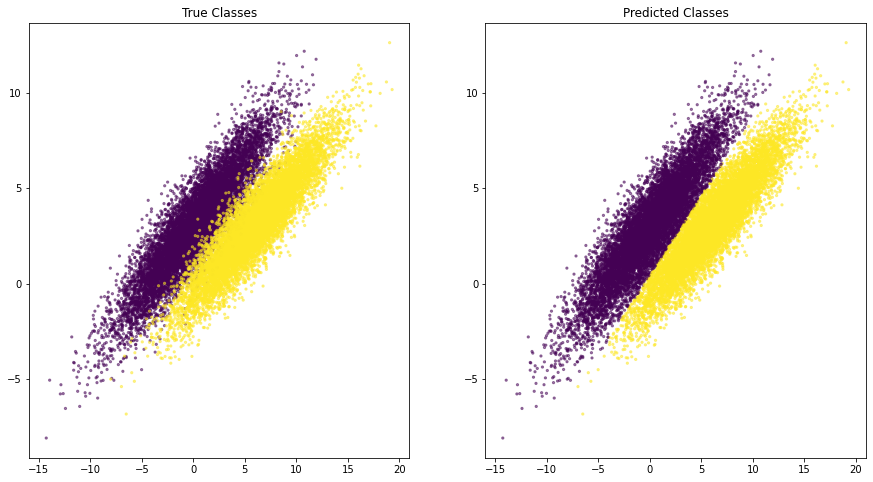

In [20]:
fig, axs = plt.subplots(1,2,figsize=(15,8))
axs[0].scatter(X[:,0],X[:,1],c=y,s=5,alpha=0.5)
axs[0].set_title('True Classes')
axs[1].scatter(X[:,0],X[:,1],c=y_pred,s=5,alpha=0.5)
axs[1].set_title('Predicted Classes')
plt.show()